#### Import the necessary libraries:

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [2]:
# Read the TSV file into a DataFrame, selecting only the first 15 columns
df_reviews = pd.read_csv('amazon_reviews_us_Home_Improvement.tsv', sep='\t', usecols=range(15))

/var/folders/h3/hp4yzh5d653_kdnmty9h8g8r0000gq/T/ipykernel_48640/2483982637.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews = pd.read_csv('amazon_reviews_us_Home_Improvement.tsv', sep='\t', usecols=range(15))


In [3]:
df_reviews.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,48881148,R215C9BDXTDQOW,B00FR4YQYK,381800308,SadoTech Model C Wireless Doorbell Operating a...,Home Improvement,4,0.0,0.0,N,Y,Four Stars,good product,2015-08-31
1,US,47882936,R1DTPUV1J57YHA,B00439MYYE,921341748,iSpring T32M 3.2 Gallon Residential Pressurize...,Home Improvement,5,0.0,0.0,N,Y,"Good price, quick shipment","Good price, quick shipment. Adequate packaging...",2015-08-31
2,US,44435471,RFAZK5EWKJWOU,B00002N762,56053291,Schlage F10CS V ELA 626 Elan Light Commercial ...,Home Improvement,5,0.0,0.0,N,Y,Five Stars,Excellent...!,2015-08-31
3,US,28377689,R2XT8X0O0WS1AL,B000QFCP1G,595928517,Citri-Strip QCG731 Paint and Varnish Stripping...,Home Improvement,5,0.0,0.0,N,Y,Although *slightly* stronger paint removers ca...,Although *slightly* stronger paint removers ca...,2015-08-31
4,US,50134766,R14GRNANKO2Y2J,B00WRCRKOI,417053744,SleekLighting Bulb Adapters / Converts Standar...,Home Improvement,5,0.0,0.0,N,Y,Great Adapters,These adapters are well made and easy to use. ...,2015-08-31


In [5]:
# Read in the TSV file, selecting only relevant columns
df_reviews_filter = df_reviews[['review_id', 'review_body', 'star_rating', 'verified_purchase']]

# Display the first few rows of the resulting DataFrame
print(df_reviews_filter.head(5))

        review_id                                        review_body  \
0  R215C9BDXTDQOW                                       good product   
1  R1DTPUV1J57YHA  Good price, quick shipment. Adequate packaging...   
2   RFAZK5EWKJWOU                                      Excellent...!   
3  R2XT8X0O0WS1AL  Although *slightly* stronger paint removers ca...   
4  R14GRNANKO2Y2J  These adapters are well made and easy to use. ...   

  star_rating verified_purchase  
0           4                 Y  
1           5                 Y  
2           5                 Y  
3           5                 Y  
4           5                 Y  


Looking the data types of the columns and overall summary.

In [5]:
df_reviews_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2629959 entries, 0 to 2629958
Data columns (total 4 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   review_id          object
 1   review_body        object
 2   star_rating        object
 3   verified_purchase  object
dtypes: object(4)
memory usage: 80.3+ MB


## Data Cleaning

### Nulls, NaN's, Missing values, Erroneous Data, Duplicate Rows, Matching datatypes

1) We remove any rows that contain missing or null values using the dropna() method of the DataFrame.
2) We remove any duplicate rows based on the review_id column using the drop_duplicates() method of the DataFrame.
3) We remove any rows that contain irrelevant or erroneous data. In this case, we keep only the rows that have a star_rating value between 1 and 5, and a verified_purchase value of either 'Y' or 'N'.
4) We convert the verified_purchase column to a boolean data type by mapping 'Y' to True and 'N' to False, and the review_body column to a string data type using the astype() method of the DataFrame. We also see inconsistent values in the column ‘star_rating’ and therefore to fix this inconsistency in star_rating column, we use the astype() method to convert the column to integer type.

In [6]:
# Remove missing or null values
df_reviews_filter.dropna(inplace=True)

# Remove duplicates
df_reviews_filter.drop_duplicates(subset='review_id', inplace=True)

# Remove irrelevant or erroneous data
df_reviews_filter = df_reviews_filter[df_reviews_filter['star_rating'].isin([1, 2, 3, 4, 5])]
df_reviews_filter = df_reviews_filter[df_reviews_filter['verified_purchase'].isin(['Y', 'N'])]

# Convert relevant columns to the correct data types
df_reviews_filter['verified_purchase'] = df_reviews_filter['verified_purchase'].map({'Y': True, 'N': False})
df_reviews_filter['review_body'] = df_reviews_filter['review_body'].astype(str)
df_reviews_filter['star_rating'] = df_reviews_filter['star_rating'].astype(int)

/var/folders/h3/hp4yzh5d653_kdnmty9h8g8r0000gq/T/ipykernel_48640/2249281724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_filter.dropna(inplace=True)
/var/folders/h3/hp4yzh5d653_kdnmty9h8g8r0000gq/T/ipykernel_48640/2249281724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_filter.drop_duplicates(subset='review_id', inplace=True)


To make the computations faster, and spend less computing power, we will also just work with 100000 records sampled randomly. To reproduce the same result, we will assign a random_seed = ‘42’. Though we can apply all the same techniques and models on the full dataset.

In [7]:
df_reviews_filter = df_reviews_filter.sample(n=100000, random_state=42)

Making sure, that we did lose some entries as we cleaned the data and that the datatypes are as intended.

In [8]:
df_reviews_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 590890 to 836738
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   review_id          100000 non-null  object
 1   review_body        100000 non-null  object
 2   star_rating        100000 non-null  int64 
 3   verified_purchase  100000 non-null  bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 3.1+ MB


### Tokenization and Stemming

In [9]:
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
# Download stopwords and initialize stemmer
nltk.download('stopwords')
nltk.download('wordnet')
stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yash.chaturvedi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yash.chaturvedi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yash.chaturvedi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We will call this data preprocessing method involving tokenization and removal of stop words whenever we want to depending on our model.

In [10]:
# Define a function to preprocess text
def preprocess_text(text):
    # Tokenize text into words
    words = nltk.word_tokenize(text)
    # Remove non-alphabetic characters and stopwords
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stopwords.words('english')]
    # Lemmatize words
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join words back into a string
    return ' '.join(words)

## Exploratory Data Analysis

To plot the star rating for verified purchase vs non verified purchases we use the groupby() method to group the dataFrame by the verified_purchase column and calculate the mean of the star_rating column for each group. Then, you can plot the mean star ratings using a bar plot.

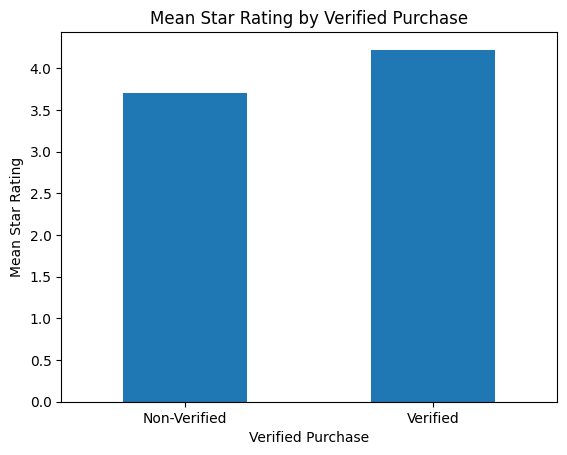

In [19]:
# Group the DataFrame by verified_purchase and calculate the mean star rating for each group
df_grouped = df_reviews_filter.groupby('verified_purchase')['star_rating'].mean()

# Plot the mean star rating for each group using a bar plot
ax = df_grouped.plot(kind='bar')
ax.set_xticklabels(['Non-Verified', 'Verified'], rotation=0)
ax.set_xlabel('Verified Purchase')
ax.set_ylabel('Mean Star Rating')
ax.set_title('Mean Star Rating by Verified Purchase')
plt.show()

### Frequency Distribution

Distribution of Star Ratings: Plotting the distribution of star ratings can provide insights into how customers rate the products in the given category. This can help identify trends, such as a higher proportion of 5-star ratings or a higher proportion of 1-star ratings.

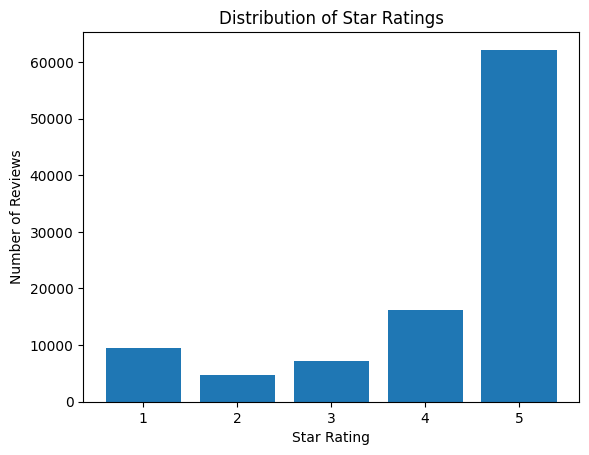

In [20]:
# group the reviews by star rating
ratings = df_reviews_filter.groupby('star_rating').size()

# plot the distribution of star ratings
plt.bar(ratings.index, ratings.values)
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Star Ratings')
plt.show()

We also produce a box plot showing the distribution of star ratings for verified and non-verified purchases. The x-axis shows the two groups, and the y-axis shows the star ratings. The box plot displays the median (line in the box), the quartiles (box), and the outliers (dots outside the box) for each group.

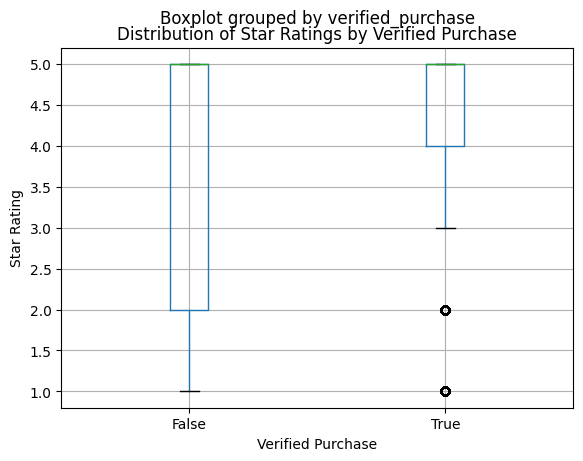

In [21]:
# Create a box plot of star ratings by verified purchase
ax = df_reviews_filter.boxplot(column='star_rating', by='verified_purchase')
ax.set_xlabel('Verified Purchase')
ax.set_ylabel('Star Rating')
ax.set_title('Distribution of Star Ratings by Verified Purchase')
plt.show()

### Language Models

In [11]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.stem import WordNetLemmatizer

### Bag-of-Words Model

In [12]:
# Apply preprocessing to review_body column which performs tasks such as tokenization, stemming, and removal of stop words
df_reviews_filter_preprocessed = df_reviews_filter
df_reviews_filter_preprocessed['review_body'] = df_reviews_filter_preprocessed['review_body'].apply(preprocess_text)

### Feature Selection

We do feature selection where we create a vector for each review using term frequency - with a value of the number of occurrences of each word in the review. We limit the max number of features to 5000 limiting ourselves to a subset of the words as features. We also drop words that are very rare (and thus have high variance in their predictive powers), as well as words that are common to all classes (such as “the”) but don’t discriminate between classes.

We create a CountVectorizer object named vectorizer with the following parameters:

max_features=5000: This sets the maximum number of features to be extracted to 5000, which means that only the 5000 most frequent words will be used to create the bag-of-words model.

stop_words='english': This tells the vectorizer to remove all English stop words (such as "the", "and", "a", etc.) from the text data, as these words are generally not informative for text classification tasks.

min_df=0.001: This sets the minimum document frequency to 0.001, which means that any word that appears in less than 0.1% of the documents will be excluded from the vocabulary.

By passing these parameters to the CountVectorizer constructor, we are creating a bag-of-words model that is optimized for text classification tasks

In [13]:
# Create a vectorizer object with max_features=5000, stop_words='english', min_df=0.001.
vectorizer = CountVectorizer(max_features=5000, stop_words = 'english', min_df = 0.001)

We use the bag-of-words model to classify the reviews as positive or negative based on the star_rating column. We use the star_rating column to generate sentiment labels where ratings of 4 or 5 stars are considered positive and ratings of 1 to 3 stars are considered negative.


In [14]:
# Define the feature and target variables
X = df_reviews_filter_preprocessed['review_body']
y = np.where(df_reviews_filter_preprocessed['star_rating'] >= 4, 'Positive', 'Negative')

In [15]:
# Fit the vectorizer on the preprocessed text
vectorizer.fit(df_reviews_filter_preprocessed['review_body'])

CountVectorizer(max_features=5000, min_df=0.001, stop_words='english')

In [16]:
# Get the feature names (i.e., the words in the corpus)
feature_names = list(vectorizer.vocabulary_.keys())

In [17]:
# Get the document-term matrix (i.e., the bag-of-words representation)
X = vectorizer.transform(df_reviews_filter_preprocessed['review_body'])

We also drop words that are very rare (and thus have high variance in their predictive powers), as well as words that are common to all classes (such as “the”) but don’t discriminate between classes.

In [18]:
# Drop words that are too rare or too common
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold = 0.01)
X = selector.fit_transform(X)

# Get the new feature names after dropping the irrelevant words
feature_names = [feature_names[i] for i in selector.get_support(indices=True)]
print('Number of features:', len(feature_names))

Number of features: 637


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

### Bag-of-Words - (Multinomial Naive Bayes)

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df_reviews_filter_preprocessed['review_body'], test_size=0.2, random_state=42)

# Train a classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [21]:
# Predicts the sentiment (positive or negative) for each review in the testing set.
y_pred = clf.predict(X_test)

# Calculates the accuracy of the classifier by comparing the predicted sentiments with the actual sentiments in y_test.
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.03985


In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)

# Print the cross-validation scores
print('Cross-validation scores:', cv_scores)
print('Average score:', cv_scores.mean())

Cross-validation scores: [0.8337  0.84065 0.83285 0.82945 0.83675]
Average score: 0.83468


### N-gram Word Model

To implement an n-gram model, we can use the ngram_range parameter of the CountVectorizer class in scikit-learn. 

The ngram_range parameter takes a tuple with two values, n1 and n2, where n1 is the smallest n-gram to consider, and n2 is the largest. 

For example, if we set ngram_range=(1,2), we will create a bag of words model that includes both unigrams (single words) and bigrams (pairs of adjacent words).

In [24]:
# Initialize the vectorizer with n-gram range (1,2)
ngram_vectorizer = CountVectorizer(stop_words='english', lowercase=True, ngram_range=(1,2))

# Define the feature and target variables
X = df_reviews_filter_preprocessed['review_body']
y = np.where(df_reviews_filter_preprocessed['star_rating'] >= 4, 'Positive', 'Negative')

# Fit the vectorizer on the preprocessed text
ngram_vectorizer.fit(X)

# Get the feature names (i.e., the words in the corpus)
feature_names = list(ngram_vectorizer.vocabulary_.keys())

X = ngram_vectorizer.transform(df_reviews_filter_preprocessed['review_body'])

# Drop words that are too rare or too common
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.001)
X = selector.fit_transform(X)

# Get the new feature names after dropping the irrelevant words
feature_names = [feature_names[i] for i in selector.get_support(indices=True)]
print('Number of features:', len(feature_names))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Number of features: 4123


### Multinomial Naive Bayes model (N-gram Word Model)

In [25]:
# Train a classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [26]:
# Evaluate the classifier
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.86105
              precision    recall  f1-score   support

    Negative       0.69      0.63      0.66      4285
    Positive       0.90      0.92      0.91     15715

    accuracy                           0.86     20000
   macro avg       0.80      0.78      0.79     20000
weighted avg       0.86      0.86      0.86     20000



In [27]:
# Perform cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)

# Print the average score
print('Cross-validation scores:', cv_scores)
print('Average score:', cv_scores.mean())

Cross-validation scores: [0.8566  0.8612  0.85745 0.85575 0.86025]
Average score: 0.85825


### Deep Learning Models

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential

#### Word Embeddings

We use the Universal Sentence Encoder to create sentence embeddings, which are then used as the input to the neural network. This approach removes the need for feature selection and allows the model to learn the most important features directly from the text data.

In [44]:
# Load the Universal Sentence Encoder
model = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

# Define the feature and target variables
X = df_reviews_filter_preprocessed['review_body']
# Convert star_rating to the respective values for either 1 (4 and 5) or 0 (1, 2 and 3)
y = np.where(df_reviews_filter_preprocessed['star_rating'] >= 4, 1, 0)

We create sentence embeddings in batches of 1000 reviews at a time, rather than processing all reviews at once. This reduces memory usage and allows us to process large datasets efficiently.

In [45]:
# Create sentence embeddings using the Universal Sentence Encoder in batches
batch_size = 1000
embeddings = []
for i in range(0, len(X), batch_size):
    batch = X[i:i+batch_size]
    batch_embeddings = model(batch)
    embeddings.append(batch_embeddings)

# Concatenate the batch embeddings
embeddings = np.concatenate(embeddings)

### Recurrent Neural Networks (Gated Recurrent Unit) 


In [61]:
from keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Embedding, GlobalMaxPooling1D, Dense
from tensorflow.keras.layers import Dropout

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, y, test_size=0.2, random_state=42)

In [52]:
# Define the model
model = Sequential([
    Dense(64, input_dim=embeddings.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

Epoch 1/5
2000/2000 [==============================] - 7s 3ms/step - loss: 0.3598 - accuracy: 0.8413 - val_loss: 0.3425 - val_accuracy: 0.8476
Epoch 2/5
2000/2000 [==============================] - 6s 3ms/step - loss: 0.3319 - accuracy: 0.8539 - val_loss: 0.3356 - val_accuracy: 0.8550
Epoch 3/5
2000/2000 [==============================] - 5s 3ms/step - loss: 0.3179 - accuracy: 0.8622 - val_loss: 0.3311 - val_accuracy: 0.8550
Epoch 4/5
2000/2000 [==============================] - 6s 3ms/step - loss: 0.3051 - accuracy: 0.8698 - val_loss: 0.3303 - val_accuracy: 0.8546
Epoch 5/5
625/625 [==============================] - 1s 2ms/step - loss: 0.3343 - accuracy: 0.8536
Accuracy: 0.8536499738693237


### Recurrent Neural Networks (LSTM layers)

In [62]:
# Define the model
model = Sequential([
    LSTM(64, input_shape=(embeddings.shape[1], 1), return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, validation_split=0.2, epochs=5, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test)
print(f'Accuracy: {accuracy}')

Epoch 1/5
2000/2000 [==============================] - 1025s 510ms/step - loss: 0.5223 - accuracy: 0.7848 - val_loss: 0.5213 - val_accuracy: 0.7801
Epoch 2/5
2000/2000 [==============================] - 1010s 505ms/step - loss: 0.5145 - accuracy: 0.7850 - val_loss: 0.5177 - val_accuracy: 0.7801
Epoch 3/5
2000/2000 [==============================] - 1010s 505ms/step - loss: 0.5119 - accuracy: 0.7850 - val_loss: 0.5140 - val_accuracy: 0.7801
Epoch 4/5
2000/2000 [==============================] - 1043s 521ms/step - loss: 0.5078 - accuracy: 0.7850 - val_loss: 0.5082 - val_accuracy: 0.7801
Epoch 5/5
625/625 [==============================] - 95s 152ms/step - loss: 0.5038 - accuracy: 0.7857
Accuracy: 0.7857499718666077


### Model Evaluation

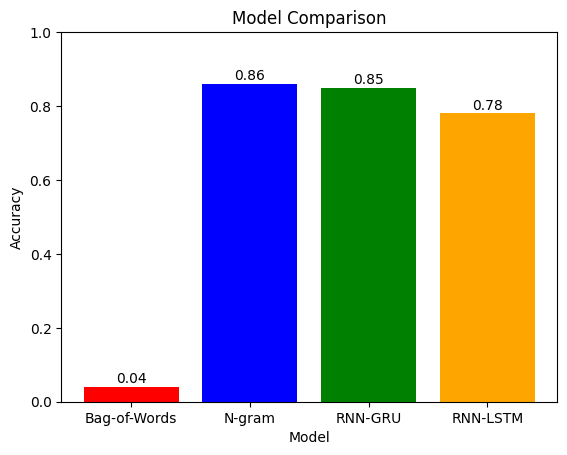

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Define the accuracy values for each model
bow_acc = 0.04
ngram_acc = 0.86
gru_acc = 0.85
lstm_acc = 0.78

# Create a bar plot of model accuracies
models = ['Bag-of-Words', 'N-gram', 'RNN-GRU', 'RNN-LSTM']
accuracy = [bow_acc, ngram_acc, gru_acc, lstm_acc]
colors = ['red', 'blue', 'green', 'orange']

plt.bar(models, accuracy, color=colors)
plt.ylim([0.0, 1.0])
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Add y values to the plot
for i, v in enumerate(accuracy):
    plt.text(i, v+0.01, str(round(v, 2)), ha='center')

plt.show()
